In [143]:
## Analysis of Giannis stats for season 23/24

In [142]:
# Data used for this representation is valid until March 17th

In [107]:
import pandas as pd

In [108]:
giannis_data = pd.read_csv("Giannis_Antetokounmpo_Season23_24_Stats.csv")

In [109]:
giannis_data.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,203507,22300958,"MAR 14, 2024",MIL vs. PHI,W,37,9,12,0.750,...,7,11,7,1,0,7,4,32,-4,1
1,22023,203507,22300945,"MAR 12, 2024",MIL @ SAC,L,33,10,17,0.588,...,12,13,4,1,0,4,3,30,-18,1
2,22023,203507,22300924,"MAR 10, 2024",MIL @ LAC,W,39,12,24,0.500,...,7,7,10,1,1,3,3,34,19,1
3,22023,203507,22300915,"MAR 08, 2024",MIL @ LAL,L,39,14,23,0.609,...,12,14,12,1,1,4,2,34,-4,1
4,22023,203507,22300899,"MAR 06, 2024",MIL @ GSW,L,33,8,15,0.533,...,5,7,6,0,1,2,1,23,-6,1


In [110]:
attributes_stats = ["VS", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT",
                    "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV",
                    "PF", "PTS", "PLUS_MINUS"]

In [111]:
giannis_data["OPPONENT"] = giannis_data["MATCHUP"].apply(lambda x: x.split()[-1])
opponent = giannis_data.pop("OPPONENT")
giannis_data.insert(5, "OPPONENT", opponent)

In [112]:
giannis_data.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,OPPONENT,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,203507,22300958,"MAR 14, 2024",MIL vs. PHI,PHI,W,37,9,12,...,7,11,7,1,0,7,4,32,-4,1
1,22023,203507,22300945,"MAR 12, 2024",MIL @ SAC,SAC,L,33,10,17,...,12,13,4,1,0,4,3,30,-18,1
2,22023,203507,22300924,"MAR 10, 2024",MIL @ LAC,LAC,W,39,12,24,...,7,7,10,1,1,3,3,34,19,1
3,22023,203507,22300915,"MAR 08, 2024",MIL @ LAL,LAL,L,39,14,23,...,12,14,12,1,1,4,2,34,-4,1
4,22023,203507,22300899,"MAR 06, 2024",MIL @ GSW,GSW,L,33,8,15,...,5,7,6,0,1,2,1,23,-6,1


In [113]:
to_remove = ["SEASON_ID",	"Player_ID",	"Game_ID",	"MATCHUP", "VIDEO_AVAILABLE"]

In [114]:
giannis_data = giannis_data.drop(columns=to_remove)

In [115]:
giannis_data["GAME_DATE"] = pd.to_datetime(giannis_data["GAME_DATE"])

C:\Users\alpesh\AppData\Local\Temp\ipykernel_9756\3512481671.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  giannis_data["GAME_DATE"] = pd.to_datetime(giannis_data["GAME_DATE"])


In [116]:
opponents = giannis_data["OPPONENT"].unique()

In [117]:
opponents

array(['PHI', 'SAC', 'LAC', 'LAL', 'GSW', 'CHI', 'CHA', 'MIN', 'MEM',
       'MIA', 'DEN', 'PHX', 'UTA', 'DAL', 'POR', 'NOP', 'CLE', 'DET',
       'BOS', 'HOU', 'SAS', 'IND', 'BKN', 'NYK', 'ORL', 'ATL', 'WAS',
       'TOR'], dtype=object)

In [118]:
averaged_df = pd.DataFrame(columns=attributes_stats)

In [119]:
averaged_df

,VS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS


In [120]:
for op in opponents:
    print(op)
    op_stats = giannis_data[giannis_data["OPPONENT"] == op]
    op_stats = op_stats.drop(columns=["GAME_DATE", "OPPONENT", "WL"])
    avg_stats = op_stats.mean(axis=0)
    avg_stats = avg_stats.apply(lambda x:round(x,2))
    print(type(avg_stats))
    row = [op]
    row[1:] = avg_stats
    pd.Series(row)
    # averaged_df = averaged_df.append(avg_stats, ignore_index=True)
    averaged_df.loc[len(averaged_df.index)] = row
    #averaged_df.insert(1, "OPP", op)
    print(averaged_df.iloc[-1])

PHI
<class 'pandas.core.series.Series'>
VS              PHI
MIN            36.0
FGM            9.67
FGA           16.67
FG_PCT          0.6
FG3M           0.33
FG3A           1.67
FG3_PCT        0.17
FTM            8.67
FTA            13.0
FT_PCT         0.62
OREB            3.0
DREB           8.67
REB           11.67
AST            6.33
STL             1.0
BLK             1.0
TOV            6.67
PF              3.0
PTS           28.33
PLUS_MINUS     -1.0
Name: 0, dtype: object
SAC
<class 'pandas.core.series.Series'>
VS             SAC
MIN           36.5
FGM            9.5
FGA           16.5
FG_PCT        0.58
FG3M           0.0
FG3A           2.0
FG3_PCT        0.0
FTM            9.5
FTA           14.0
FT_PCT        0.68
OREB           1.0
DREB          10.5
REB           11.5
AST            7.0
STL            2.0
BLK            0.0
TOV            4.0
PF             3.5
PTS           28.5
PLUS_MINUS   -15.5
Name: 1, dtype: object
LAC
<class 'pandas.core.series.Series'>
VS             

In [121]:
averaged_df

,VS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,PHI,36.00,9.67,16.67,0.60,0.33,1.67,0.17,8.67,13.00,...,3.00,8.67,11.67,6.33,1.00,1.00,6.67,3.00,28.33,-1.00
1,SAC,36.50,9.50,16.50,0.58,0.00,2.00,0.00,9.50,14.00,...,1.00,10.50,11.50,7.00,2.00,0.00,4.00,3.50,28.50,-15.50
2,LAC,39.00,12.00,24.00,0.50,0.00,2.00,0.00,10.00,15.00,...,0.00,7.00,7.00,10.00,1.00,1.00,3.00,3.00,34.00,19.00
3,LAL,39.00,14.00,23.00,0.61,1.00,3.00,0.33,5.00,7.00,...,2.00,12.00,14.00,12.00,1.00,1.00,4.00,2.00,34.00,-4.00
4,GSW,35.00,10.50,18.50,0.56,1.00,3.00,0.33,6.00,8.50,...,2.50,5.50,8.00,5.50,0.00,0.50,3.00,2.00,28.00,-2.50
5,CHI,38.00,12.25,18.50,0.66,0.75,1.75,0.25,9.50,13.00,...,3.75,9.50,13.25,4.75,1.25,1.50,2.75,3.50,34.75,6.00
6,CHA,27.25,7.25,12.00,0.60,0.75,1.00,0.50,4.50,6.25,...,1.50,8.50,10.00,4.50,0.50,0.25,1.50,3.50,19.75,18.75
7,MIN,34.00,8.00,13.50,0.60,0.50,1.50,0.50,8.50,14.00,...,2.50,5.50,8.00,6.00,1.00,0.00,3.00,1.00,25.00,-8.50
8,MEM,37.00,15.00,17.00,0.88,0.00,0.00,0.00,5.00,9.00,...,0.00,4.00,4.00,12.00,0.00,0.00,1.00,5.00,35.00,-14.00
9,MIA,35.33,11.33,18.33,0.62,1.00,2.33,0.44,6.00,8.00,...,1.67,7.67,9.33,5.00,1.00,1.33,3.67,2.00,29.67,4.33


In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Points')

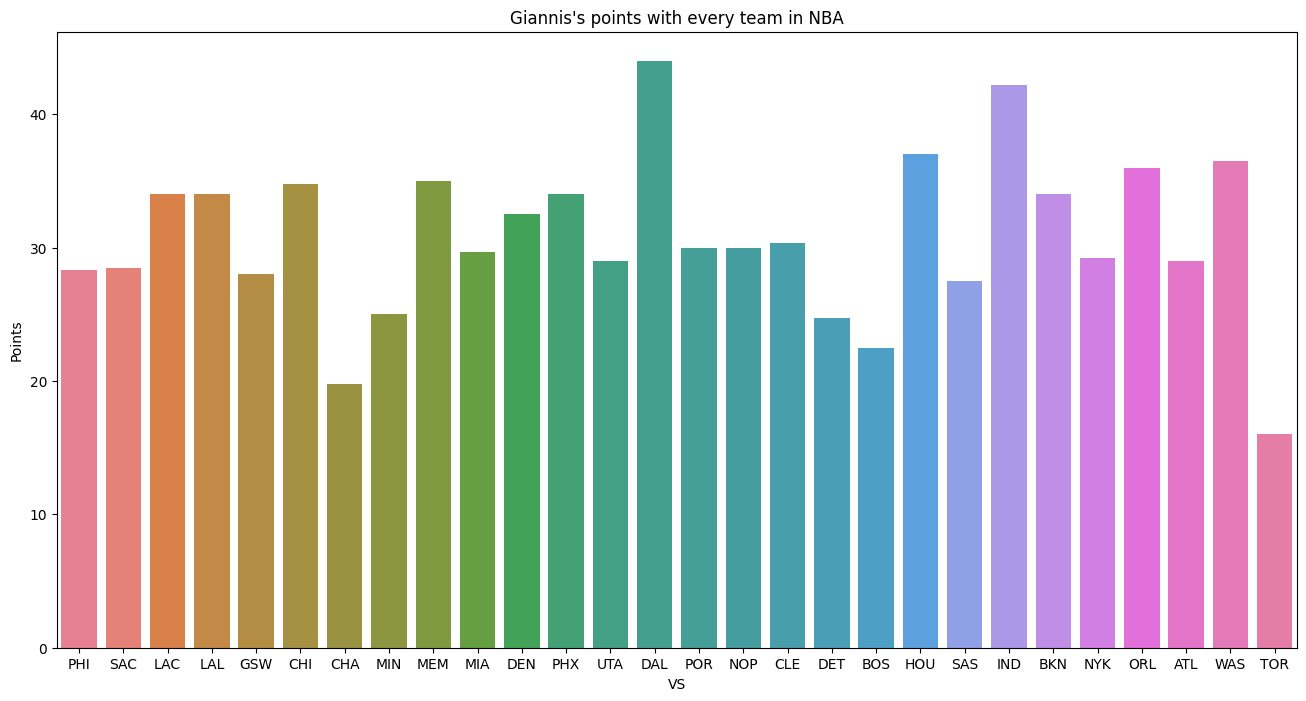

In [123]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's points with every team in NBA")
sns.barplot(data=averaged_df, x="VS", y="PTS", hue="VS")
plt.ylabel("Points")

Text(0, 0.5, 'Rebounds')

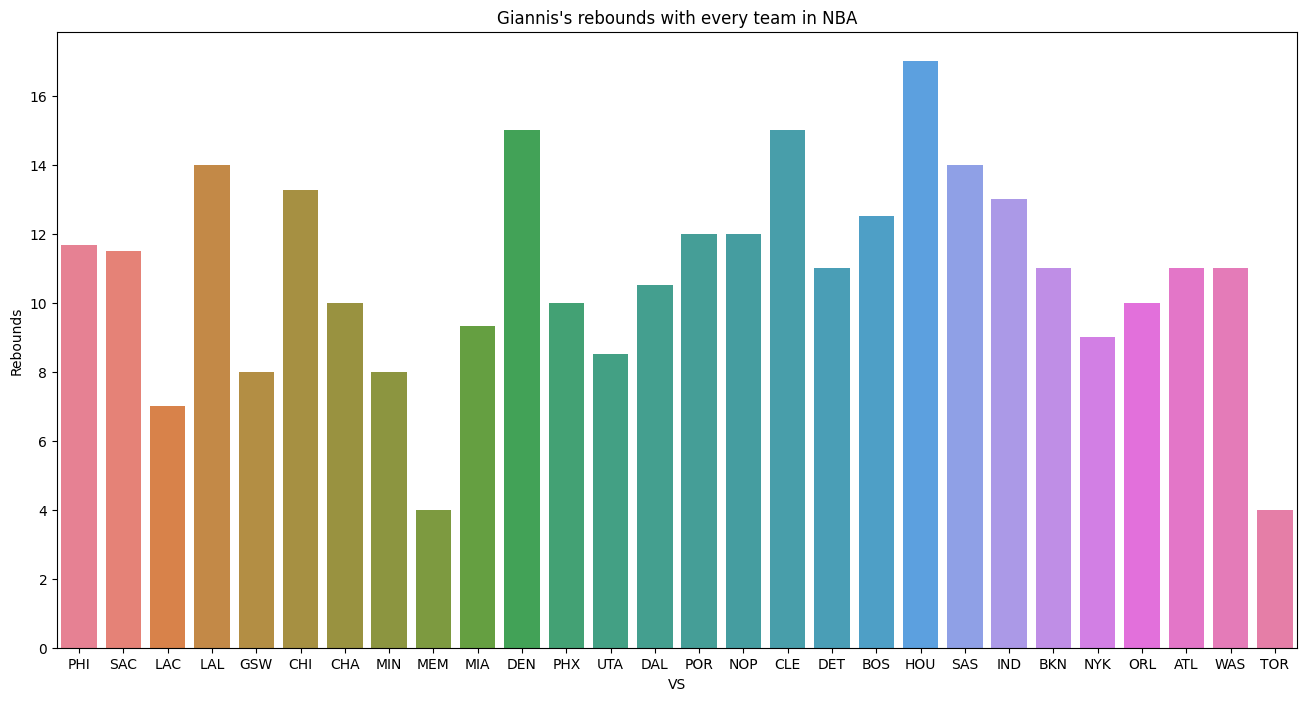

In [124]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's rebounds with every team in NBA")
sns.barplot(data=averaged_df, x="VS", y="REB", hue="VS")
plt.ylabel("Rebounds")

Text(0, 0.5, 'Assists')

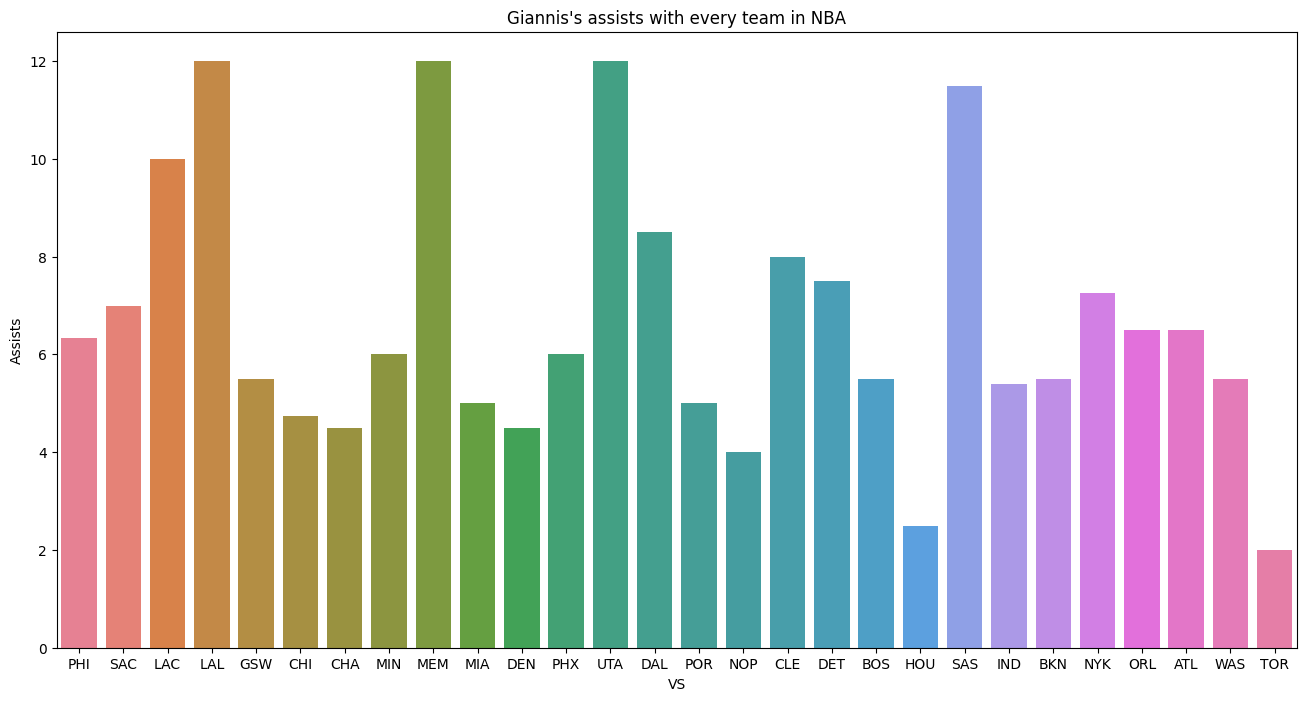

In [125]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's assists with every team in NBA")
sns.barplot(data=averaged_df, x="VS", y="AST", hue="VS")
plt.ylabel("Assists")

Text(0, 0.5, 'Blocks')

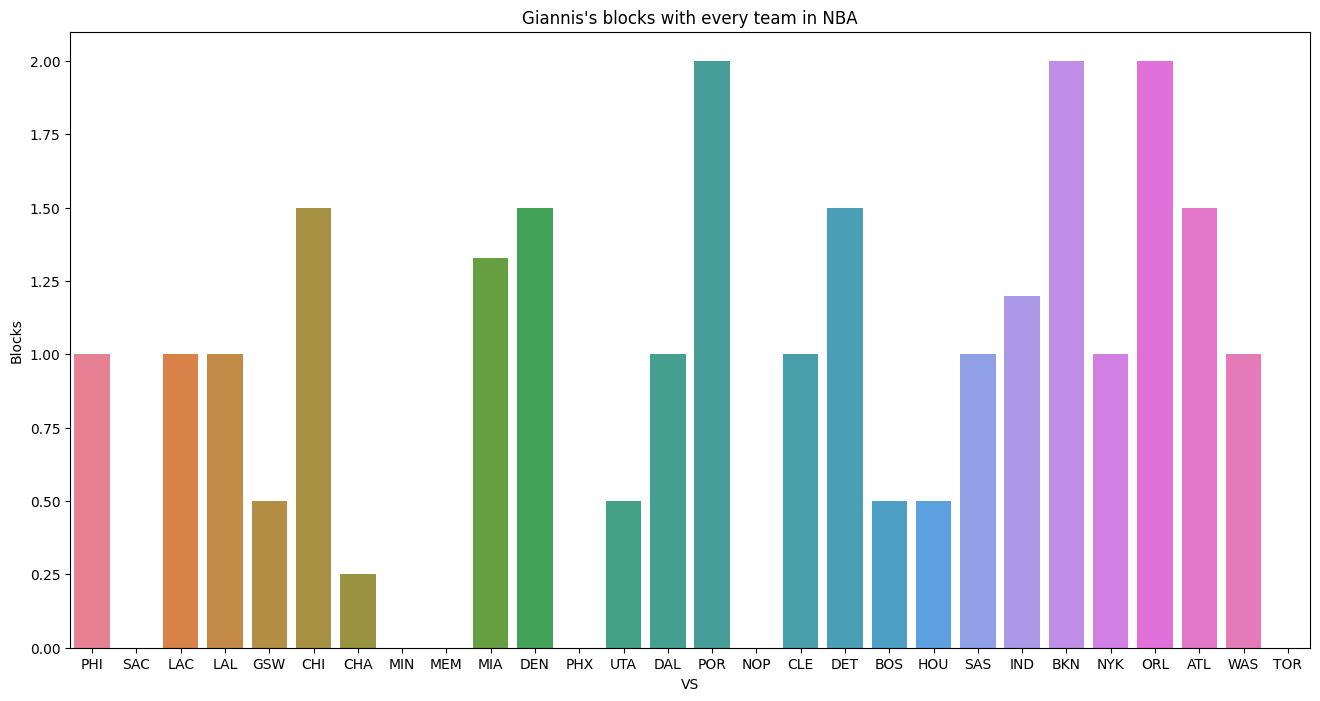

In [126]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's blocks with every team in NBA")
sns.barplot(data=averaged_df, x="VS", y="BLK", hue="VS")
plt.ylabel("Blocks")

Text(0, 0.5, 'Field goal percentage')

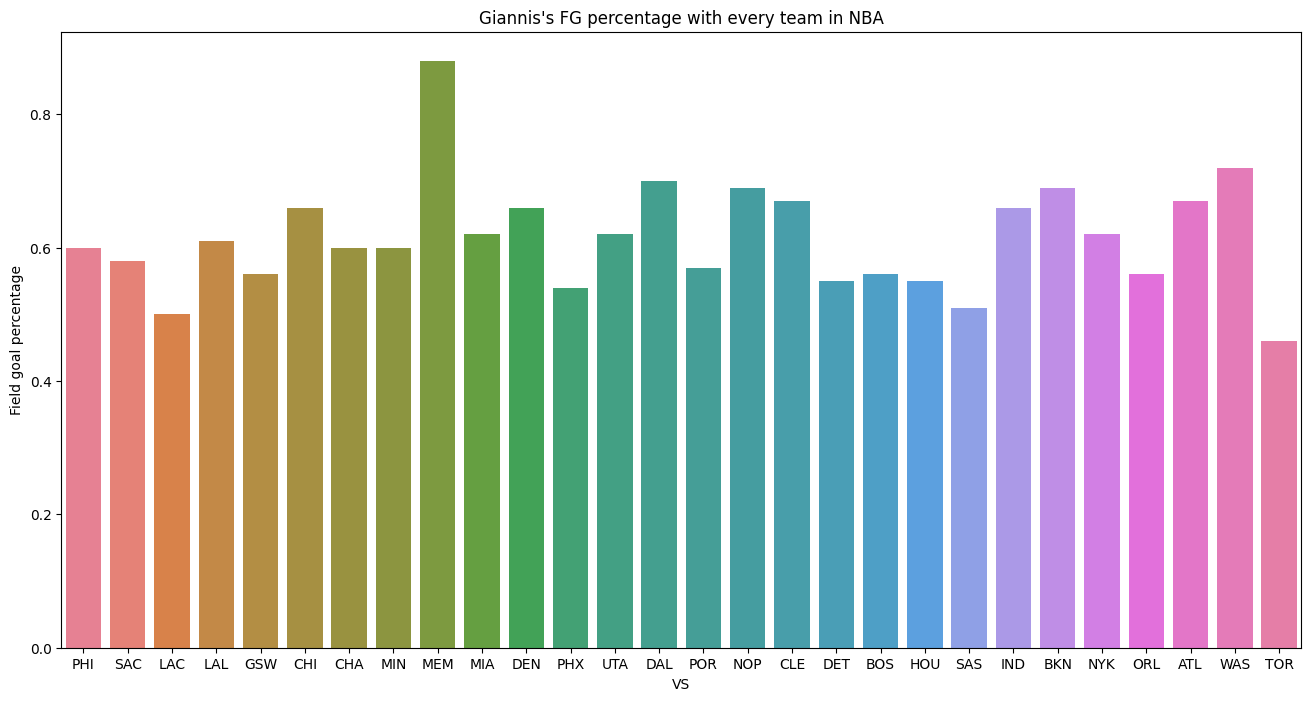

In [127]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's FG percentage with every team in NBA")
sns.barplot(data=averaged_df, x="VS", y="FG_PCT", hue="VS")
plt.ylabel("Field goal percentage")

<Axes: title={'center': "Gannis's +/- through the season"}, xlabel='GAME_DATE', ylabel='PLUS_MINUS'>

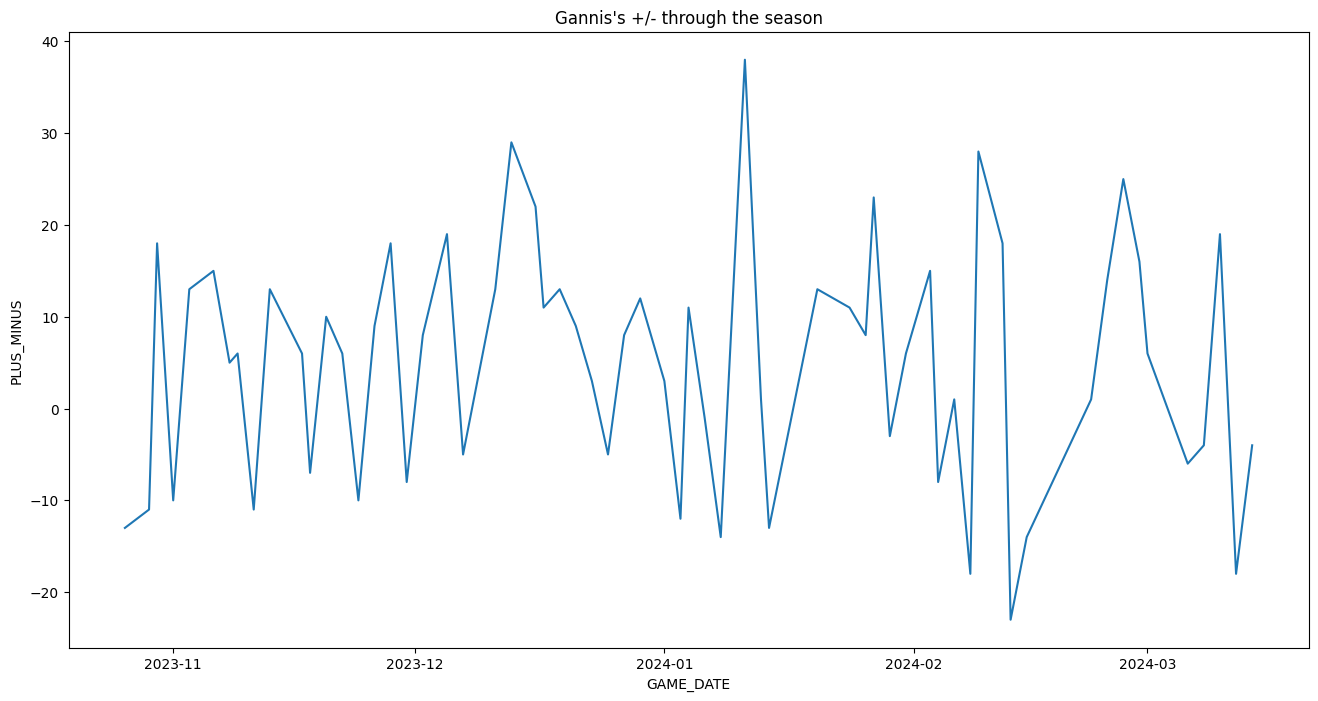

In [128]:
plt.figure(figsize=(16, 8))
plt.title("Gannis's +/- through the season")
sns.lineplot(data=giannis_data, x="GAME_DATE", y="PLUS_MINUS")

Text(0.5, 0, 'GAME_DATE')

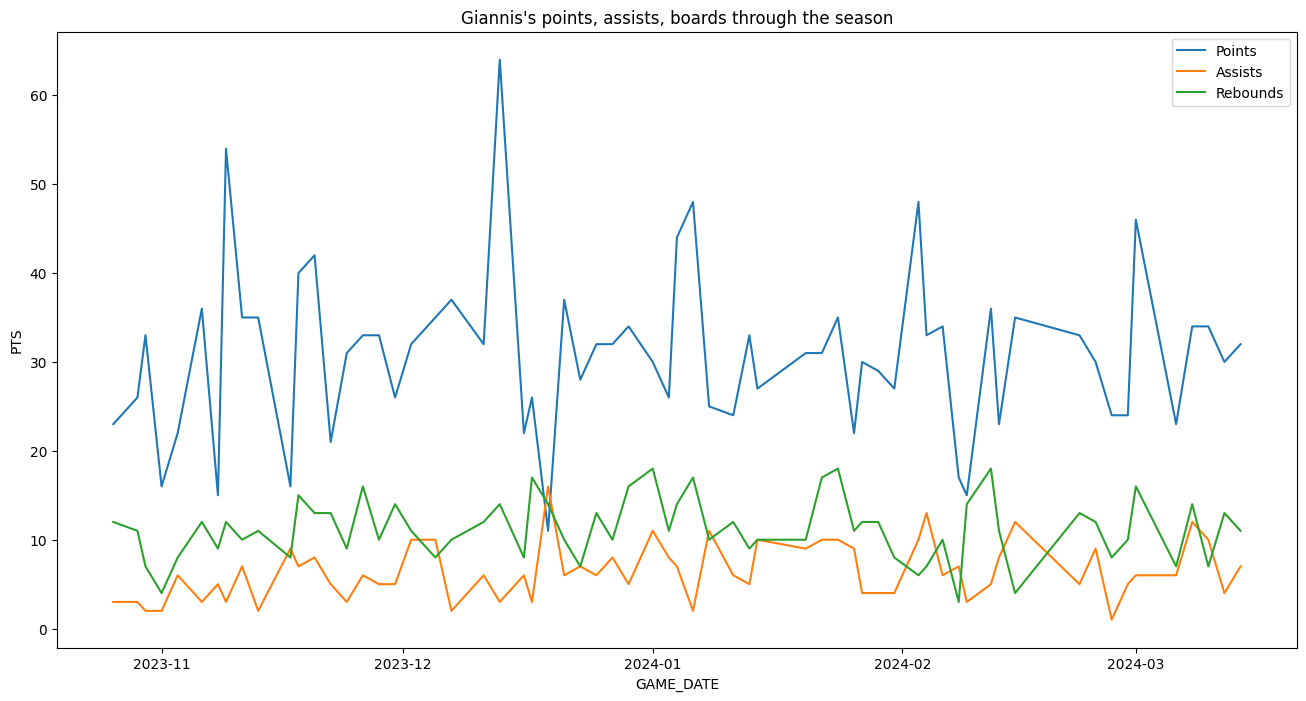

In [129]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's points, assists, boards through the season")
sns.lineplot(data=giannis_data, x="GAME_DATE", y="PTS", label="Points")
sns.lineplot(data=giannis_data, x="GAME_DATE", y="AST", label="Assists")
sns.lineplot(data=giannis_data, x="GAME_DATE", y="REB", label="Rebounds")
plt.xlabel("GAME_DATE")

Text(0, 0.5, 'Minutes')

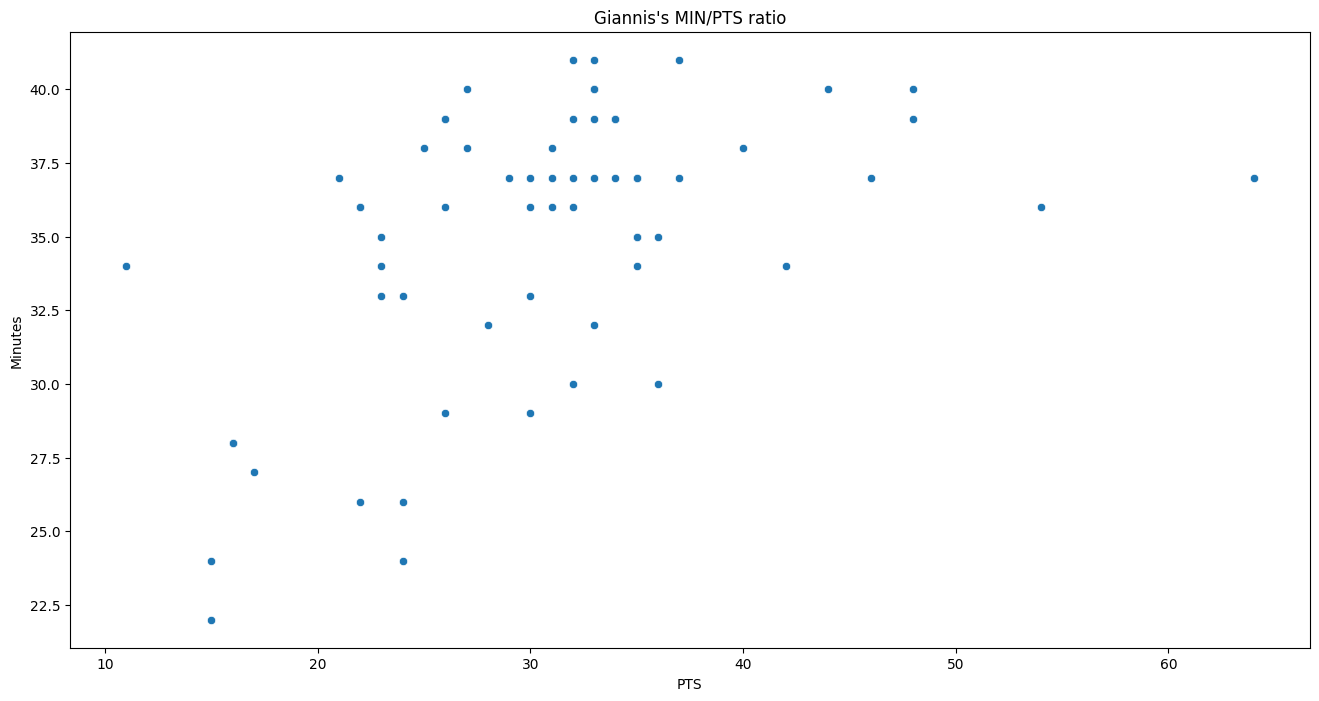

In [130]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's MIN/PTS ratio")
sns.scatterplot(data=giannis_data, x="PTS", y="MIN")
plt.ylabel("Minutes")

Text(0, 0.5, 'Points')

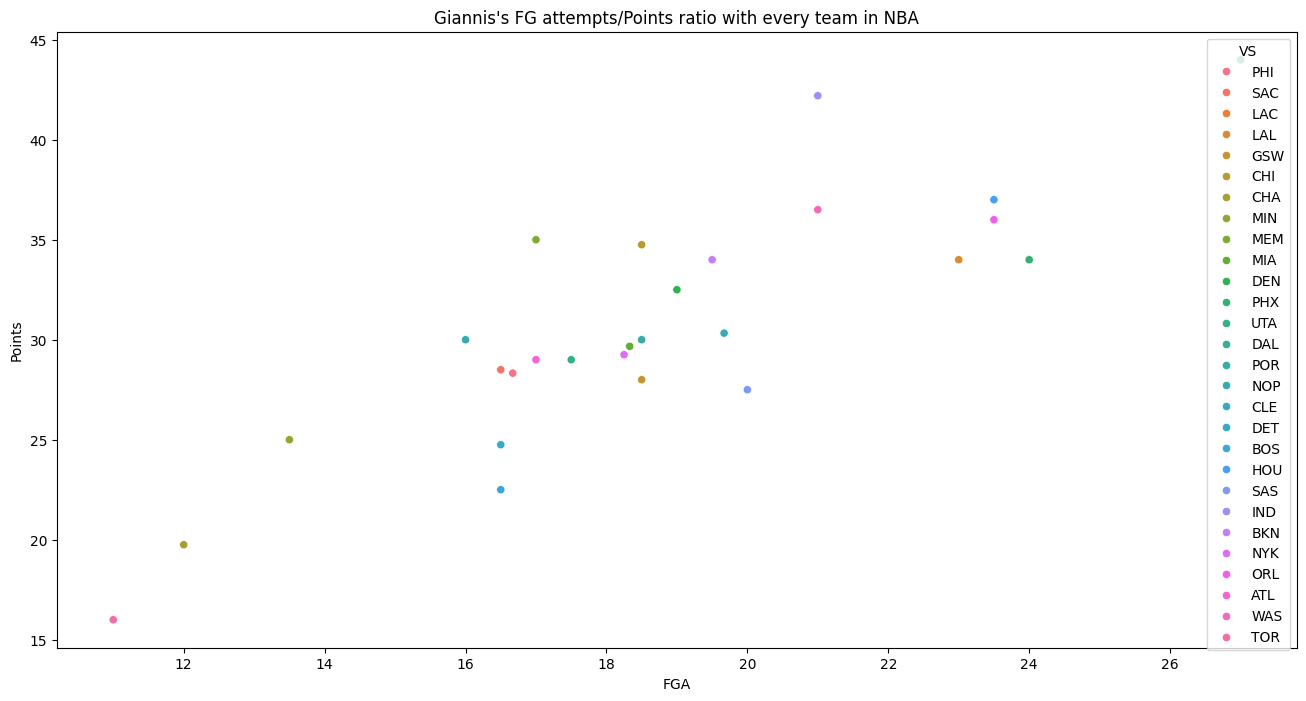

In [133]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's FG attempts/Points ratio with every team in NBA")
sns.scatterplot(data=averaged_df, x="FGA", y="PTS", hue="VS")
plt.ylabel("Points")

Text(0, 0.5, 'Points')

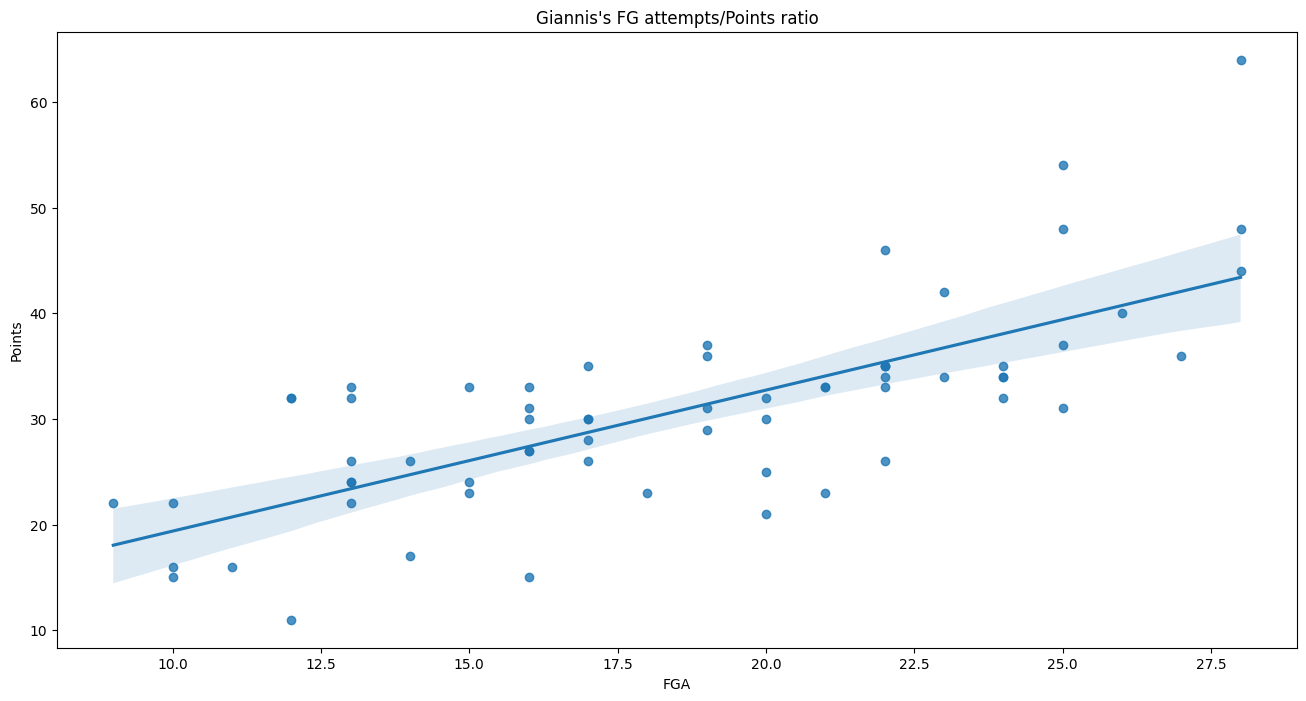

In [134]:
plt.figure(figsize=(16, 8))
plt.title("Giannis's FG attempts/Points ratio")
sns.regplot(data=giannis_data, x="FGA", y="PTS")
plt.ylabel("Points")

Text(0, 0.5, 'Number of games')

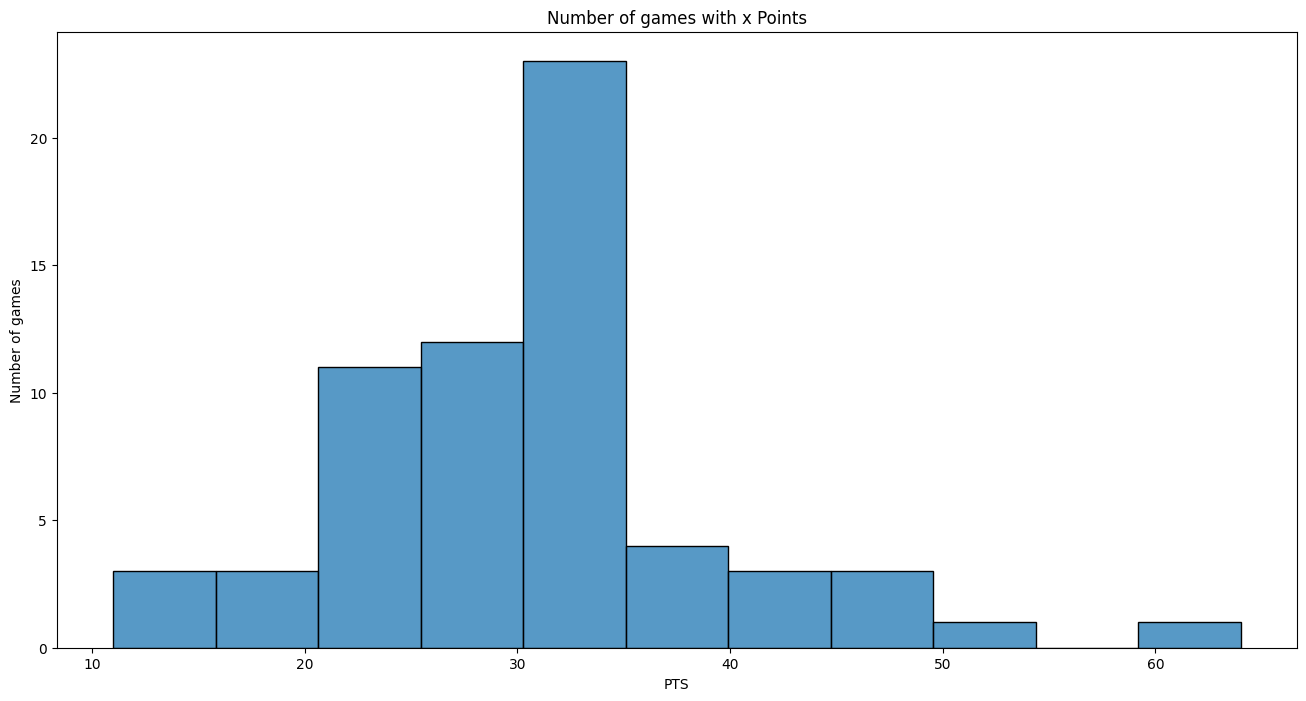

In [135]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Points")
sns.histplot(data=giannis_data["PTS"])
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

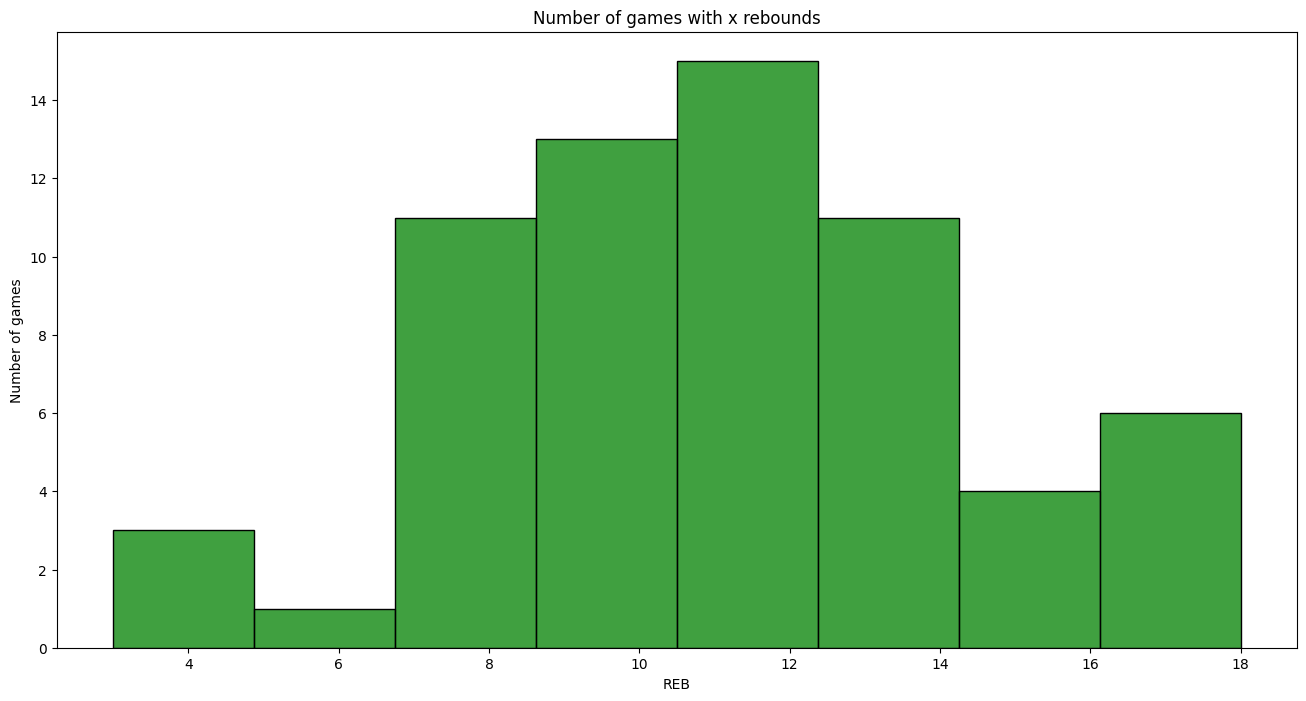

In [136]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x rebounds")
sns.histplot(data=giannis_data["REB"], color='green')
plt.ylabel("Number of games")

Text(0.5, 1.0, 'Distribution of points, by winning and losing games')

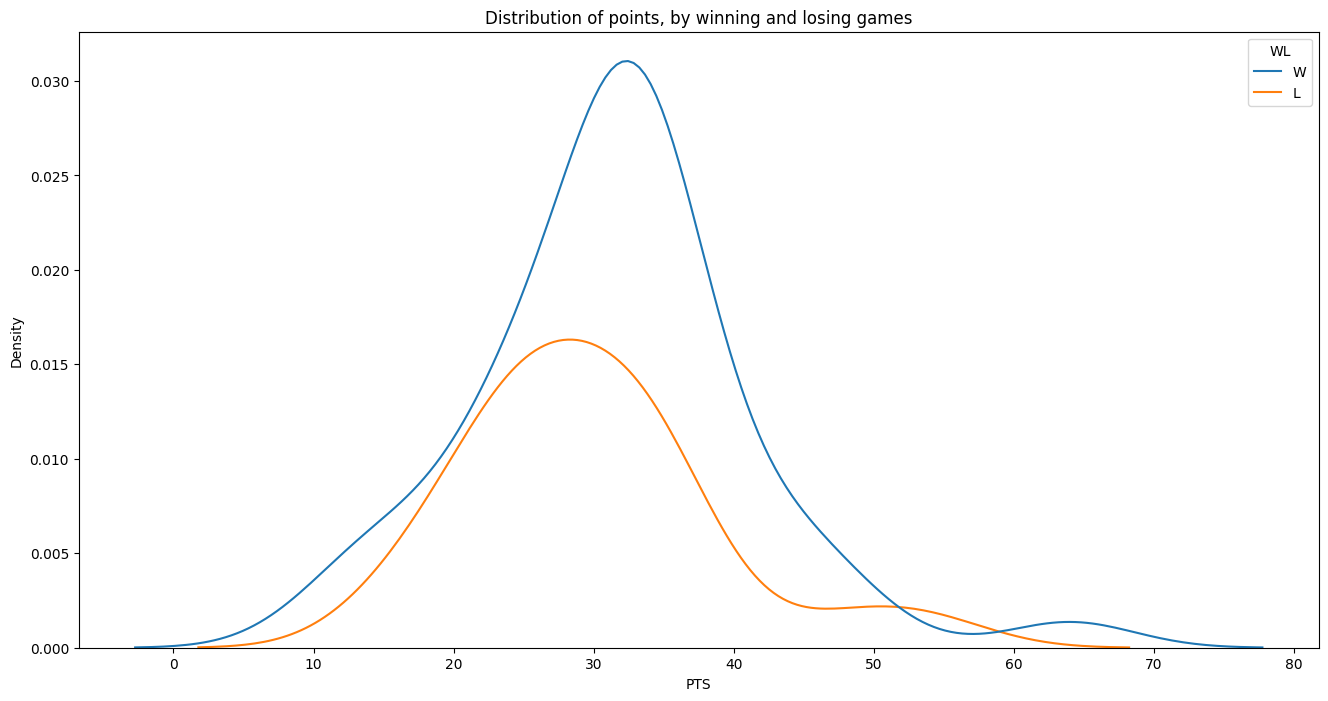

In [140]:
plt.figure(figsize=(16, 8))
sns.kdeplot(data=giannis_data, x="PTS", hue="WL")
plt.title("Distribution of points, by winning and losing games")

Text(0, 0.5, 'Free throw attempts')

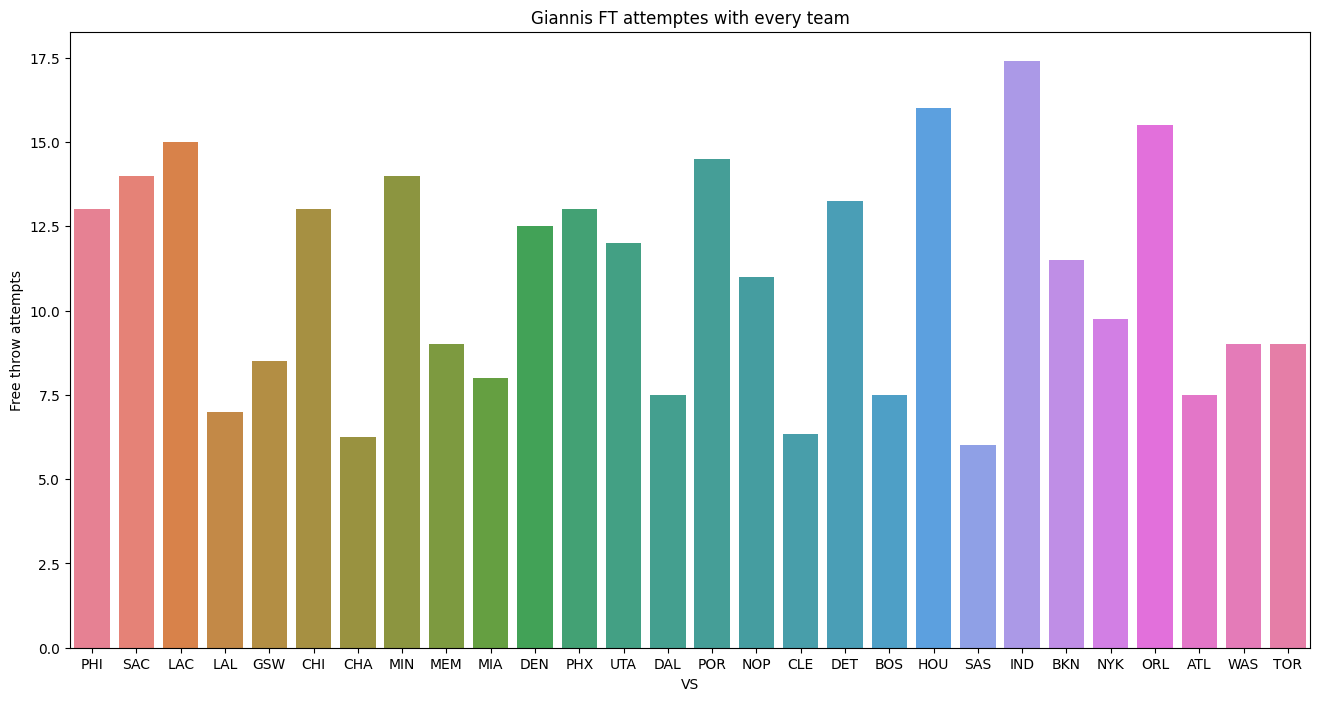

In [141]:
plt.figure(figsize=(16, 8))
plt.title("Giannis FT attemptes with every team")
sns.barplot(data=averaged_df, x="VS", y="FTA", hue="VS")
plt.ylabel("Free throw attempts")